In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
import pandas as pd
import csv

df = pd.read_csv(
    "IMDB Dataset.csv",
    quoting=csv.QUOTE_NONE,
    encoding="utf-8",
    on_bad_lines="skip"   # skip problematic rows
)
print(df.head())

In [13]:
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (10000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [14]:

df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [15]:
X = df['review']
y = df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [18]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [19]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200)
}

In [20]:
results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Naive Bayes Accuracy: 0.8580
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       994
           1       0.87      0.84      0.86      1006

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000


Logistic Regression Accuracy: 0.8870
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       994
           1       0.88      0.90      0.89      1006

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000


Random Forest Accuracy: 0.8600
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       994
           1       0.87      0.85      0.86      1006

    accuracy                           0.86      2000
   macro avg       0.86     

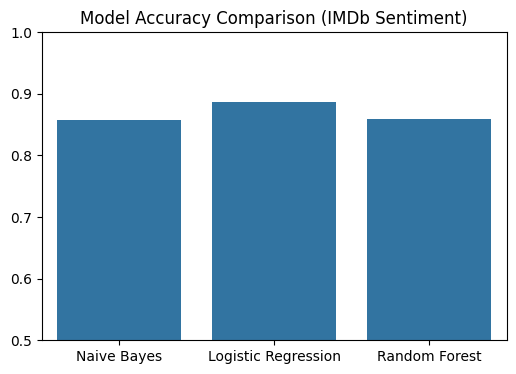

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison (IMDb Sentiment)")
plt.ylim(0.5, 1.0)
plt.show()

In [22]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_tfidf)

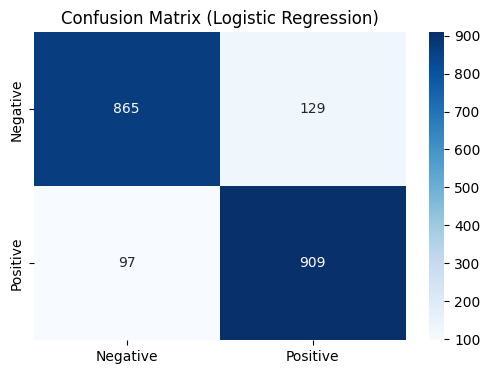

In [23]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'])
plt.title(f"Confusion Matrix ({best_model_name})")
plt.show()

In [24]:
sample_reviews = [
    "This movie was absolutely fantastic! Great acting and story.",
    "Terrible movie, I hated every minute of it.",
    "The plot was boring but the cinematography was beautiful.",
    "Best film I've seen this year!"
]

In [27]:

sample_features = vectorizer.transform(sample_reviews)
predictions = best_model.predict(sample_features)

In [28]:
for review, pred in zip(sample_reviews, predictions):
    print(f"\nReview: {review}")
    print("Predicted Sentiment:", "Positive" if pred==1 else "Negative")


Review: This movie was absolutely fantastic! Great acting and story.
Predicted Sentiment: Positive

Review: Terrible movie, I hated every minute of it.
Predicted Sentiment: Negative

Review: The plot was boring but the cinematography was beautiful.
Predicted Sentiment: Negative

Review: Best film I've seen this year!
Predicted Sentiment: Positive
